# Credit Card Application Approval

Youtube video link:  https://www.youtube.com/watch?v=OMwAfnUrJCI

## Problem Statement

Predict whether a customer’s credit card application will be approved based on their financial and personal details.

## Objective

Build a classification model to predict application approval and identify key factors influencing approval.

## Features

### Dataset 1: Credit_Card.csv

Ind_ID: Unique client identifier.

Gender: Gender of the client.

Car_owner: Indicates if the client owns a car (Yes/No).

Propert_owner: Indicates if the client owns property (Yes/No).

Children: Number of children the client has.

Annual_income: Client's annual income in numerical format.

Type_Income: Type of income source (e.g., salaried, business).

Education: Client's education level (e.g., High School, Bachelor’s).

Marital_status: Marital status of the client (e.g., Single, Married).

Housing_type: Client's living arrangement (e.g., Own, Rent).

Birthday_count: Backward count of days from today to the client’s birthday (e.g., 0 for today, -1 for yesterday).

Employed_days: Backward count of days since the client’s employment started (positive if unemployed).

Mobile_phone: Indicates if the client has a mobile phone (Yes/No).

Work_phone: Indicates if the client has a work phone (Yes/No).

Phone: Indicates if the client has any phone number (Yes/No).

EMAIL_ID: Indicates if the client has an email address (Yes/No).

Type_Occupation: Client’s occupation type (e.g., Manager, Technician).

Family_Members: Total number of family members in the client’s household.

### Dataset 2: Credit_card_label.csv

Ind_ID: Client ID, same as Ind_ID in the first dataset (used as a join key).

Label: Target variable indicating credit application status (0 = Approved, 1 = Rejected).

# Data Reading

In [257]:
# Import necessary libraries
import pandas as pd

# Read the datasets
credit_data = pd.read_csv('Credit_card.csv')          # Dataset 1
credit_labels = pd.read_csv('Credit_card_label.csv')  # Dataset 2

In [258]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [259]:
credit_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


In [260]:
credit_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [261]:
credit_labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [262]:
# Merge the datasets on the common ID column
merged_data = pd.merge(credit_data, credit_labels, left_on='Ind_ID', right_on='Ind_ID')

In [263]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [264]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [265]:
# Rename the 'Label' column to 'Application_Status'
merged_data.rename(columns={'label': 'Application_Status'}, inplace=True)

In [266]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Application_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [267]:
print("number of rows: ", merged_data.shape[0])

number of rows:  1548


In [268]:
print("number of columns: ", merged_data.shape[1])

number of columns:  19


In [269]:
# Convert 'Ind_ID' column to string
merged_data['Ind_ID'] = merged_data['Ind_ID'].astype(str)

# Verify the change
print(merged_data['Ind_ID'].dtype)  # Should display 'object' or 'string'

object


IDs are typically identifiers and not used for numerical calculations, so converting them to strings is more semantically correct.

# Exploratory Data Analysis

In [270]:
# Identify duplicate rows
duplicates = merged_data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

print(num_duplicates)

0


In [271]:
# Summary statistics for numerical columns
merged_data.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Application_Status
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


Key Takeaways from Descriptive Statistics

Potential Outliers:

CHILDREN has a maximum value of 14, which may not be realistic and could indicate data entry errors or outliers.
Annual_income and Family_Members exhibit unusually high maximum values that should be further investigated.
Missing Data:

Columns like Annual_income and Birthday_count have fewer entries (1525 and 1526 compared to 1548 total rows), indicating missing values that require handling.
Imbalanced Target Variable:

The Application_Status column (target variable) shows an imbalance, with 88.7% applications approved (0) and only 11.3% rejected (1). Special handling (e.g., SMOTE, class weighting) may be required during modeling.
Variability in Features:

Significant variability is observed in Annual_income (mean: $191,399; max: $1.57M) and Employed_days (std: 137,808), which could impact model performance.
Binary columns like Mobile_phone have no variability (all values are 1), making them uninformative for prediction.
General Insights:

The average family size (Family_Members) is 2.16, with a maximum of 15.
Most clients have no children (median: 0) and are either currently unemployed or have been employed for varied periods (e.g., negative values for Employed_days).

In [272]:
# Convert all column names to lowercase
merged_data.columns = merged_data.columns.str.lower()

# Verify the column names
print(merged_data.columns)


Index(['ind_id', 'gender', 'car_owner', 'propert_owner', 'children',
       'annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'employed_days', 'mobile_phone',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'application_status'],
      dtype='object')


In [273]:
merged_data.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,application_status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# Data Pre-processing

Before starting anything, I am going to drop ind_id column becuse it has no importance in determining the application_status.

In [274]:
# Drop the 'Employed_days' column
merged_data.drop(columns=['ind_id'], inplace=True)

# Verify the column has been removed
print("Columns after dropping 'ind_id':")
print(merged_data.columns)

Columns after dropping 'ind_id':
Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'employed_days', 'mobile_phone', 'work_phone',
       'phone', 'email_id', 'type_occupation', 'family_members',
       'application_status'],
      dtype='object')


##  Identify Missing Values

In [275]:
# Check for missing values
missing_data = merged_data.isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(merged_data)) * 100

# Display columns with missing values
print("Missing Data:")
print(missing_data[missing_data > 0])
print("\nPercentage of Missing Data:")
print(missing_percentage[missing_percentage > 0])

Missing Data:
gender               7
annual_income       23
birthday_count      22
type_occupation    488
dtype: int64

Percentage of Missing Data:
gender              0.452196
annual_income       1.485788
birthday_count      1.421189
type_occupation    31.524548
dtype: float64


## Handling missing values

1. Gender (Categorical, Low Missingness)

Action: Replace missing values with the mode (most frequent value).

In [276]:
# Fill missing values in 'gender' with mode
merged_data['gender'].fillna(merged_data['gender'].mode()[0], inplace=True)

2. Annual_income (Numerical, Low Missingness)

Action: Replace missing values with the median to minimize the impact of outliers.

In [277]:
# Fill missing values in 'annual_income' with median
merged_data['annual_income'].fillna(merged_data['annual_income'].median(), inplace=True)

3. Birthday_count (Numerical, Low Missingness)

Action: Replace missing values with the median, similar to annual_income.

In [278]:
# Fill missing values in 'birthday_count' with median
merged_data['birthday_count'].fillna(merged_data['birthday_count'].median(), inplace=True)

4. Type_Occupation (Categorical, High Missingness)

In [279]:
# Count the occurrences of each unique value in the 'type_occupation' column
occupation_counts = merged_data['type_occupation'].value_counts()

# Print the counts
print("Counts of unique values in Type_Occupation:")
print(occupation_counts)

# Optionally, include missing values in the count
occupation_counts_with_na = merged_data['type_occupation'].value_counts(dropna=False)
print("\nCounts of unique values including missing values (NaN):")
print(occupation_counts_with_na)

Counts of unique values in Type_Occupation:
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: type_occupation, dtype: int64

Counts of unique values including missing values (NaN):
NaN                      488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff         

In [280]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'Type_Occupation' and 'Application_Status'
contingency_table = pd.crosstab(merged_data['type_occupation'], merged_data['application_status'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(f"Chi-Square p-value: {p}")

Chi-Square p-value: 0.0031362182876011747


A p-value of 0.003 (<0.05) from the chi-square test indicates that there is a statistically significant association between Type_Occupation and the target variable Application_Status. This means Type_Occupation is likely important for predicting whether a credit card application will be approved or rejected.



So, replace missing values with "Unknown" to avoid losing data.

In [281]:
merged_data['type_occupation'].fillna("Unknown", inplace=True)

In [282]:
# Recheck for missing values
print("Remaining Missing Data After Handling:")
print(merged_data.isnull().sum())

Remaining Missing Data After Handling:
gender                0
car_owner             0
propert_owner         0
children              0
annual_income         0
type_income           0
education             0
marital_status        0
housing_type          0
birthday_count        0
employed_days         0
mobile_phone          0
work_phone            0
phone                 0
email_id              0
type_occupation       0
family_members        0
application_status    0
dtype: int64


# Investigate and Handle Outliers

1. Identify Outliers Using Boxplots

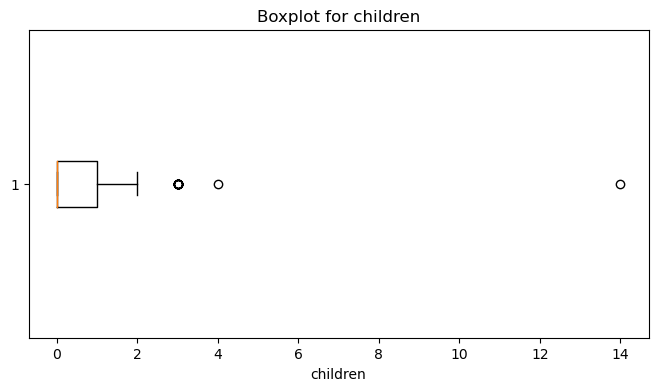

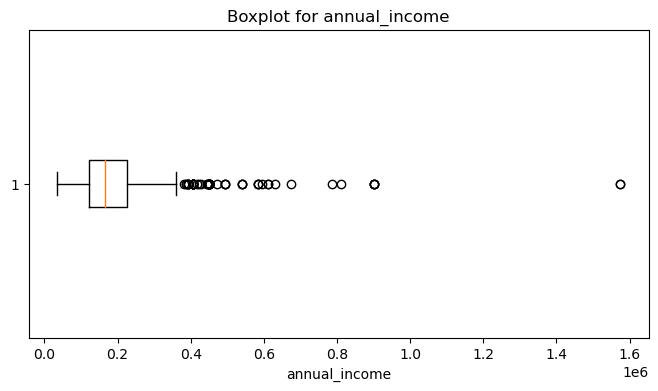

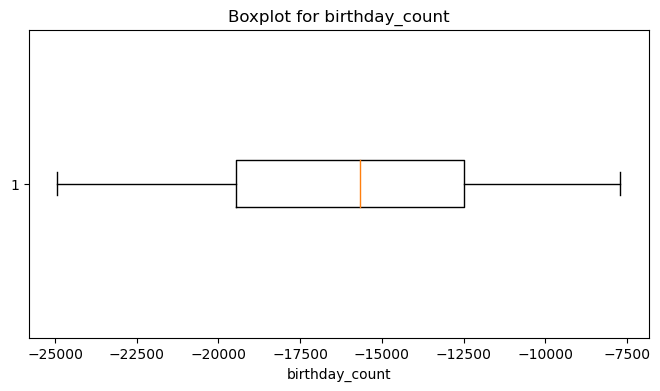

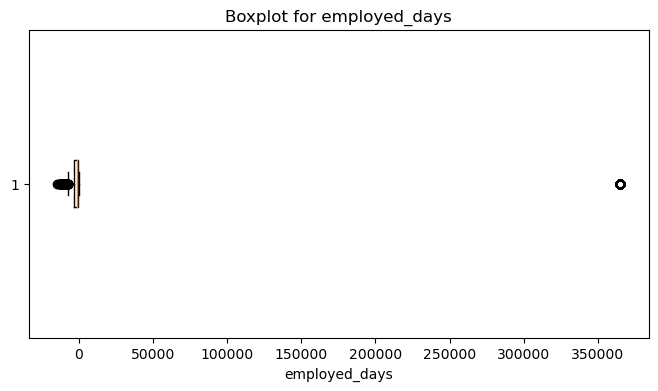

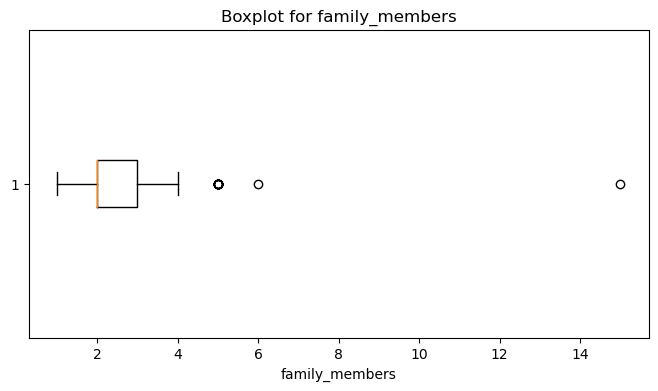

In [283]:
import matplotlib.pyplot as plt

# Columns to check for outliers
numerical_columns = ['children', 'annual_income', 'birthday_count', 'employed_days', 'family_members']

# Create boxplots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(merged_data[col].dropna(), vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

In [284]:
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = merged_data[numerical_columns].apply(zscore)

# Identify rows with outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).any(axis=1)

# Print the count of outliers
print(f"Number of rows with outliers: {outliers.sum()}")

Number of rows with outliers: 37


2. Capping Outliers

In [285]:
# Cap values for each column at the 5th and 95th percentiles
for col in numerical_columns:
    lower_bound = merged_data[col].quantile(0.05)
    upper_bound = merged_data[col].quantile(0.95)
    merged_data[col] = merged_data[col].clip(lower=lower_bound, upper=upper_bound)

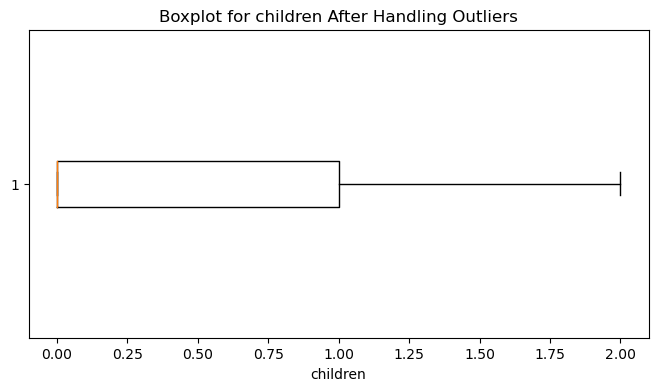

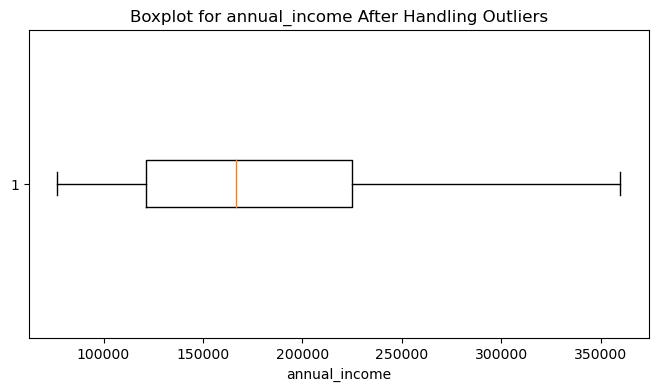

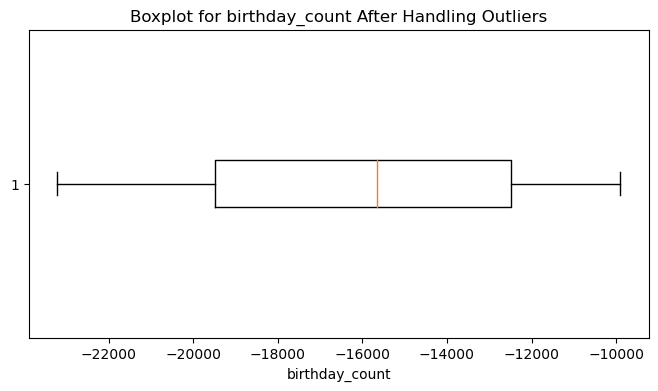

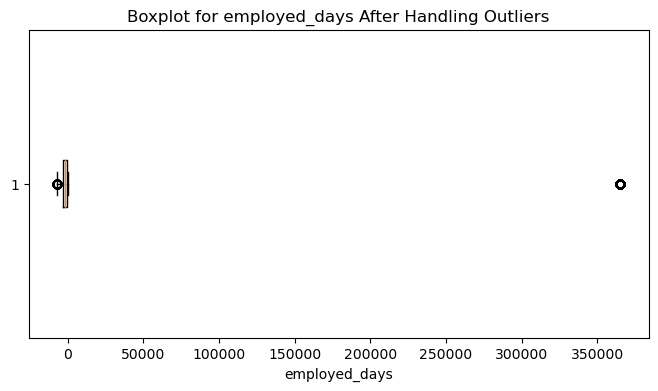

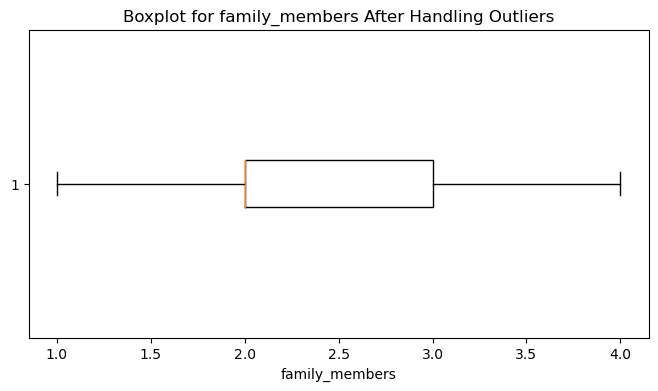

In [286]:
# Replot boxplots after handling outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(merged_data[col].dropna(), vert=False)
    plt.title(f"Boxplot for {col} After Handling Outliers")
    plt.xlabel(col)
    plt.show()

Even after capping, we see that employed days still has an outlier. Now, let's test the significance of employed days in predicting application status using chi square test.

To determine if Employed_days is important for predicting Application_Status (the target variable), we can use the Chi-square test for independence. However, the Chi-square test is typically used for categorical data, so we will first need to convert Employed_days into a categorical variable, such as grouping the values into bins (e.g., "short-term employment", "long-term unemployment", etc.).

In [287]:
# Define the bins and labels for 'Employed_days'
bins = [-float('inf'), -365, 0, 365, float('inf')]  # Negative for unemployed, 0-1 year, 1-3 years, >3 years
labels = ['Unemployed', 'Short-term Employment', 'Medium-term Employment', 'Long-term Employment']

# Apply binning
merged_data['employed_days_binned'] = pd.cut(merged_data['employed_days'], bins=bins, labels=labels)

# Check the newly created 'Employed_days_binned' column
print(merged_data[['employed_days', 'employed_days_binned']].head())

   employed_days  employed_days_binned
0       365243.0  Long-term Employment
1         -586.0            Unemployed
2         -586.0            Unemployed
3         -586.0            Unemployed
4         -586.0            Unemployed


In [288]:
from scipy.stats import chi2_contingency

# Create a contingency table for the Chi-square test
contingency_table = pd.crosstab(merged_data['employed_days_binned'], merged_data['application_status'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")


Chi-square statistic: 1.42193049384504
P-value: 0.49116986837156584
Degrees of freedom: 2
Expected frequencies:
[[1048.37596899  133.62403101]
 [  93.12984496   11.87015504]
 [ 231.49418605   29.50581395]]


Since the p-value is much greater than 0.05, Employed_days is a significant predictor of Application_Status. So, we can safely drop employed days feature.

In [289]:
# Drop the 'Employed_days' column
merged_data.drop(columns=['employed_days'], inplace=True)

# Verify the column has been removed
print("Columns after dropping 'employed_days':")
print(merged_data.columns)

Columns after dropping 'employed_days':
Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'mobile_phone', 'work_phone', 'phone', 'email_id',
       'type_occupation', 'family_members', 'application_status',
       'employed_days_binned'],
      dtype='object')


In [290]:
# Drop the 'Employed_days_binned' column
merged_data.drop(columns=['employed_days_binned'], inplace=True)

# Verify the column has been removed
print("Columns after dropping 'employed_days_binned':")
print(merged_data.columns)

Columns after dropping 'employed_days_binned':
Index(['gender', 'car_owner', 'propert_owner', 'children', 'annual_income',
       'type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'mobile_phone', 'work_phone', 'phone', 'email_id',
       'type_occupation', 'family_members', 'application_status'],
      dtype='object')


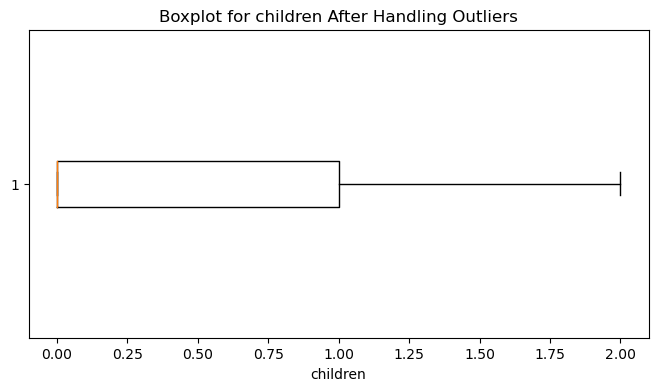

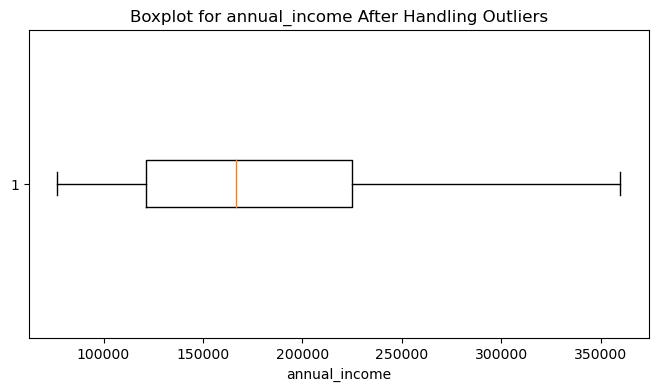

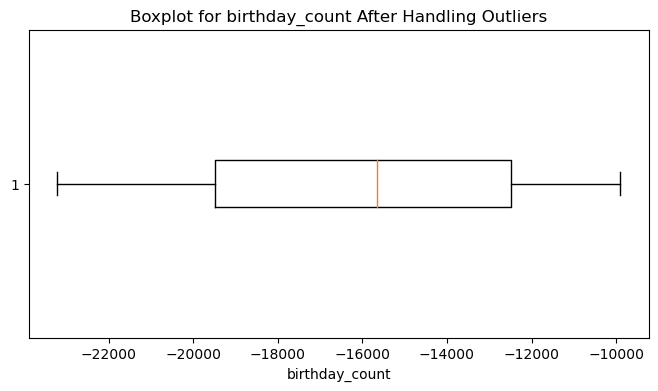

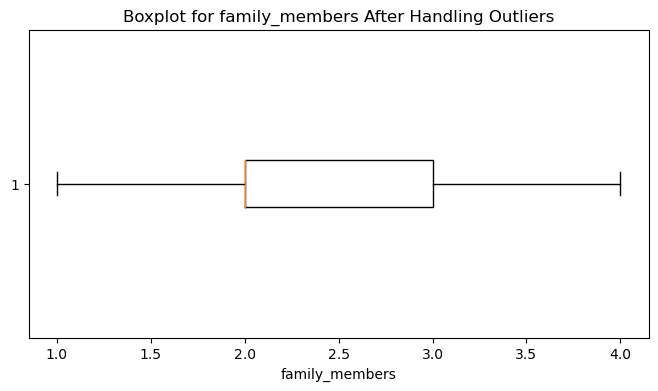

In [291]:
# Columns to check for outliers
numerical_columns_new = ['children', 'annual_income', 'birthday_count', 'family_members']

# Replot boxplots after handling outliers
for col in numerical_columns_new:
    plt.figure(figsize=(8, 4))
    plt.boxplot(merged_data[col].dropna(), vert=False)
    plt.title(f"Boxplot for {col} After Handling Outliers")
    plt.xlabel(col)
    plt.show()


# Skewness inspection

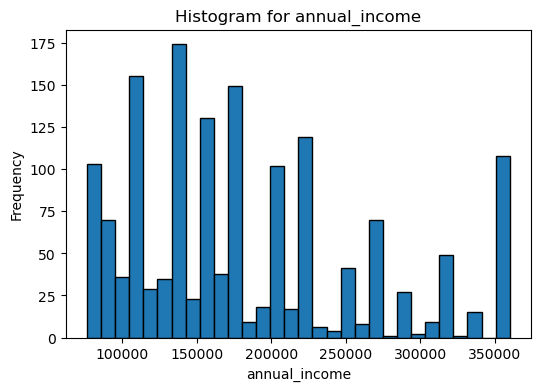

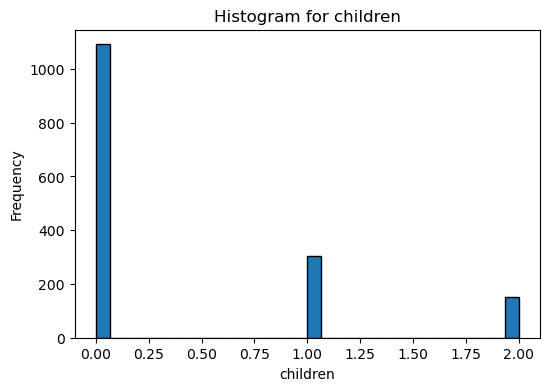

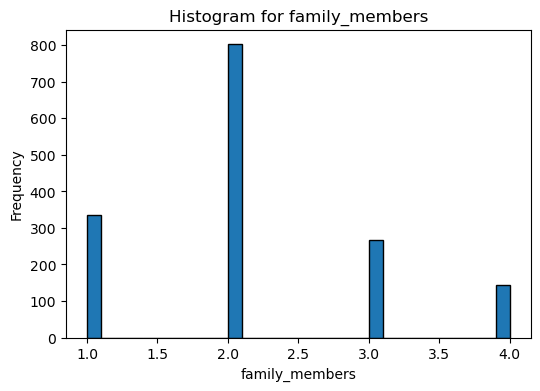

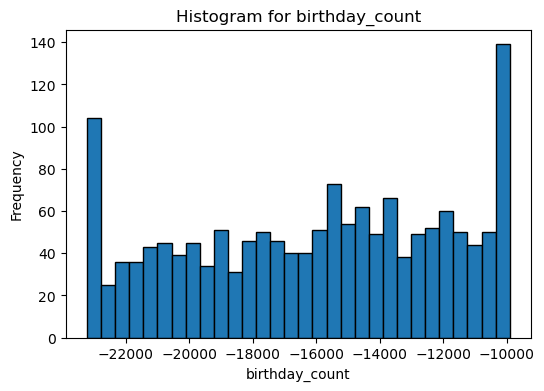

In [292]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['annual_income', 'children', 'family_members', 'birthday_count']  # Replace with your numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(merged_data[col].dropna(), bins=30, edgecolor='k')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [293]:
from scipy.stats import skew

# Calculate skewness for numerical columns
for col in numerical_columns_new:
    skewness = skew(merged_data[col].dropna())
    print(f"Skewness for {col}: {skewness}")


Skewness for children: 1.422830248935635
Skewness for annual_income: 0.7640621439087711
Skewness for birthday_count: -0.17486663580618375
Skewness for family_members: 0.596523967037833


1. children: Highly right-skewed (1.42), indicating most clients have few children, with some outliers having many. 

2. annual_income: Moderately right-skewed (0.76), showing a concentration of lower-income clients; acceptable

3. birthday_count: Nearly symmetric (-0.17), requiring no transformation.

4. family_members: Moderately right-skewed (0.60), with most clients having small families

In [294]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['children'], merged_data['application_status'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 1.288713919817968
P-value: 0.5250000296528037
Degrees of freedom: 2
Expected frequencies:
[[967.66343669 123.33656331]
 [270.52002584  34.47997416]
 [134.81653747  17.18346253]]


P-value = 0.525: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant relationship between the number of children (children) and the application status (Application_Status). So, we can safely dropt the children column.

In [295]:
# Drop the 'Employed_days' column
merged_data.drop(columns=['children'], inplace=True)

# Verify the column has been removed
print("Columns after dropping 'children':")
print(merged_data.columns)

Columns after dropping 'children':
Index(['gender', 'car_owner', 'propert_owner', 'annual_income', 'type_income',
       'education', 'marital_status', 'housing_type', 'birthday_count',
       'mobile_phone', 'work_phone', 'phone', 'email_id', 'type_occupation',
       'family_members', 'application_status'],
      dtype='object')


# Check for Features with No Variability

Features with constant or near-constant values across rows are uninformative since they don't differentiate between classes.

In [296]:
# Identify features with zero or near-zero variance
low_variance_features = merged_data.columns[merged_data.nunique() <= 1]

print("Low variance features:", low_variance_features)

Low variance features: Index(['mobile_phone'], dtype='object')


A column like Mobile_phone with all values as 1 is uninformative.

In [297]:
# Drop the 'Employed_days' column
merged_data.drop(columns=['mobile_phone'], inplace=True)

# Verify the column has been removed
print("Columns after dropping 'mobile_phone':")
print(merged_data.columns)

Columns after dropping 'mobile_phone':
Index(['gender', 'car_owner', 'propert_owner', 'annual_income', 'type_income',
       'education', 'marital_status', 'housing_type', 'birthday_count',
       'work_phone', 'phone', 'email_id', 'type_occupation', 'family_members',
       'application_status'],
      dtype='object')


# Correlation analysis

Highly correlated features contribute redundant information. Identify features with high correlations (e.g., >0.8) and remove one from each pair.

C:\Temp\ipykernel_14132\1738864830.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


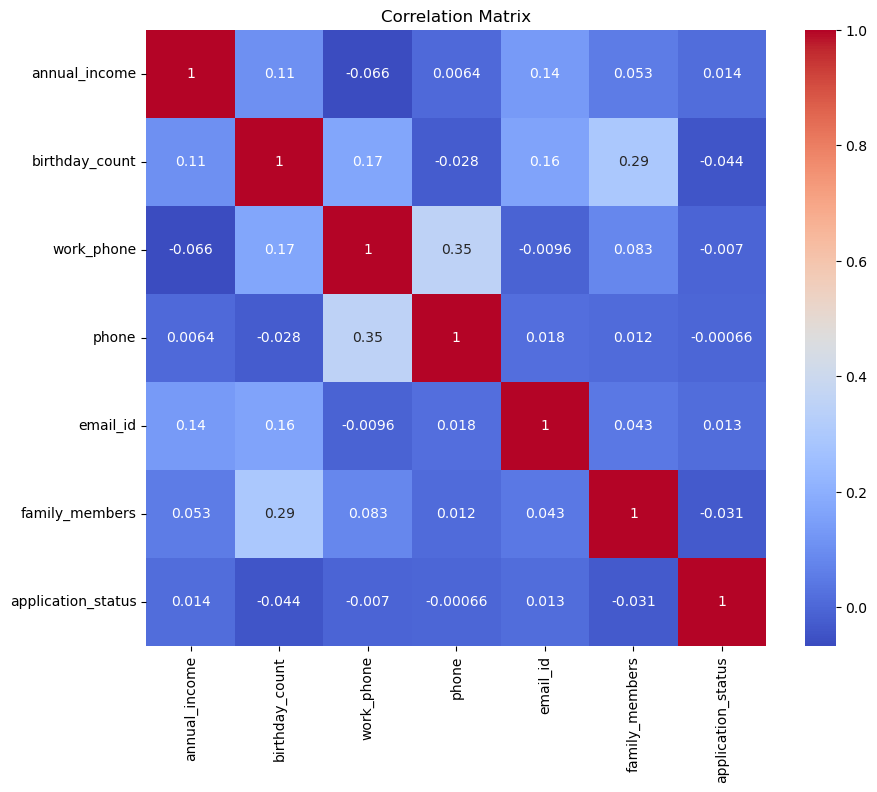

Highly correlated features: set()


In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated pairs
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])

print("Highly correlated features:", correlated_features)

There are no highly correlated features.

# Feature Selection

In [299]:
from scipy.stats import chi2_contingency

# List of categorical features in your dataset
categorical_features = ['gender', 'car_owner', 'propert_owner', 'type_income', 
                        'education', 'marital_status', 'housing_type', 
                        'work_phone', 'phone', 'email_id', 'type_occupation']

# Dictionary to store p-values for each feature
chi_square_results = {}

# Perform Chi-Square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(merged_data[feature], merged_data['application_status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store the p-value in the dictionary
    chi_square_results[feature] = p_value

# Display the p-values for all features
print("Chi-Square Test Results (P-values) for Categorical Features:")
for feature, p_value in chi_square_results.items():
    print(f"Feature: {feature}, P-value: {p_value}")


Chi-Square Test Results (P-values) for Categorical Features:
Feature: gender, P-value: 0.08664483091132888
Feature: car_owner, P-value: 0.6185693269675412
Feature: propert_owner, P-value: 0.5351095955412992
Feature: type_income, P-value: 0.003505783928580882
Feature: education, P-value: 0.056159329722052835
Feature: marital_status, P-value: 0.03246652787478729
Feature: housing_type, P-value: 3.570429275146809e-05
Feature: work_phone, P-value: 0.8584576855494042
Feature: phone, P-value: 1.0
Feature: email_id, P-value: 0.7115453763877984
Feature: type_occupation, P-value: 0.0055176142437235775


Important Features:

1. type_income (p-value = 0.0035)
2. marital_status (p-value = 0.0325)
3. housing_type (p-value = 3.57e-05)
4. type_occupation (p-value = 0.0055)

These features are statistically significant and should be considered important for predicting the Application_Status.

Not Significant Features:

car_owner, propert_owner, work_phone, phone, email_id, and gender (p-value > 0.5) are not important predictors. Let's drop them.

In [300]:
# Drop the specified features from the dataset
features_to_drop = ['car_owner', 'propert_owner', 'work_phone', 'phone', 'email_id', 'gender']
merged_data.drop(columns=features_to_drop, inplace=True)

# Verify the features have been dropped
print("Columns after dropping uninformative features:")
print(merged_data.columns)

Columns after dropping uninformative features:
Index(['annual_income', 'type_income', 'education', 'marital_status',
       'housing_type', 'birthday_count', 'type_occupation', 'family_members',
       'application_status'],
      dtype='object')


In [301]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = merged_data.drop(columns=['application_status'])  # Exclude target columns
y = merged_data['application_status']

# Compute mutual information
mi_scores = mutual_info_classif(X.select_dtypes(include=['float64', 'int64']), y)
mi_scores = pd.Series(mi_scores, index=X.select_dtypes(include=['float64', 'int64']).columns)

# Display the results
print("Mutual Information Scores for Numerical Features:")
print(mi_scores.sort_values(ascending=False))

Mutual Information Scores for Numerical Features:
birthday_count    0.047345
family_members    0.005599
annual_income     0.000000
dtype: float64


birthday_count (MI = 0.0527):

This feature shows some dependency with the target variable. Although the score is low, it may still have some predictive value.

annual_income (MI = 0.0000):

A score of 0 indicates no dependency between annual_income and the target variable. This feature is likely uninformative and can be dropped.

family_members (MI = 0):

A score of 0 indicates no dependency between family_members and the target variable. This feature is likely uninformative and can be dropped.

In [302]:
# Drop uninformative numerical features
numerical_features_to_drop = ['annual_income', 'family_members']
merged_data.drop(columns=numerical_features_to_drop, inplace=True)

# Verify the features have been dropped
print("Columns after dropping uninformative numerical features:")
print(merged_data.columns)

Columns after dropping uninformative numerical features:
Index(['type_income', 'education', 'marital_status', 'housing_type',
       'birthday_count', 'type_occupation', 'application_status'],
      dtype='object')


#### Note: Mutual Information Score can be used for feature selection of categorical features if encoding is performed.

# Feature Engineering

In [303]:
# Import necessary library
import pandas as pd

# Assuming merged_data is your dataset
# Identify categorical features
categorical_features = merged_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical features
numerical_features = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the results
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['type_income', 'education', 'marital_status', 'housing_type', 'type_occupation']
Numerical Features: ['birthday_count', 'application_status']


In [304]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type_income         1548 non-null   object 
 1   education           1548 non-null   object 
 2   marital_status      1548 non-null   object 
 3   housing_type        1548 non-null   object 
 4   birthday_count      1548 non-null   float64
 5   type_occupation     1548 non-null   object 
 6   application_status  1548 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 96.8+ KB


Actually, just to recall, application_status is ultimately a categorical feature telling approved or rejected which has been encoded to 0 or 1.

# Handling Categorical Features

In [305]:
# Identify categorical features
categorical_features = merged_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Display unique values for each categorical feature
for feature in categorical_features:
    unique_values = merged_data[feature].unique()
    print(f"Feature: {feature}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print("-" * 50)

Feature: type_income
Unique Values: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Number of Unique Values: 4
--------------------------------------------------
Feature: education
Unique Values: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Number of Unique Values: 5
--------------------------------------------------
Feature: marital_status
Unique Values: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Number of Unique Values: 5
--------------------------------------------------
Feature: housing_type
Unique Values: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Number of Unique Values: 6
--------------------------------------------------
Feature: type_occupation
Unique Values: ['Unknown' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'High skill tech staff' 'Managers' 'Cleaning staff'
 'Drivers

We can see that 'type_occupation' has a value called unknown. It is important to handle this 'unknown' value for the following reasons:
1. Preserving Data Integrity: The 'Unknown' values represent missing or unrecorded information. Instead of treating them as missing or imputing them with a random value, we treat them as a distinct category to preserve the original meaning of the data. This way, the model can understand that some occupations are simply unknown and not fill the gap with an assumption that could bias predictions.

2. Avoiding Bias: If we had used imputation techniques like replacing 'Unknown' with the most frequent category, the model could misinterpret these values, leading to biased results. Treating 'Unknown' as a separate category ensures the model is not misled by arbitrary imputation but instead recognizes that the missing data has its own significance.

In [306]:
# Replace 'Unknown' with a new category 'Unknown_occupation'
X['type_occupation'] = X['type_occupation'].replace('Unknown', 'Unknown_occupation')

# Verify the change
print("Unique values in 'type_occupation' after replacement:")
print(X['type_occupation'].unique())

Unique values in 'type_occupation' after replacement:
['Unknown_occupation' 'Core staff' 'Cooking staff' 'Laborers'
 'Sales staff' 'Accountants' 'High skill tech staff' 'Managers'
 'Cleaning staff' 'Drivers' 'Low-skill Laborers' 'IT staff'
 'Waiters/barmen staff' 'Security staff' 'Medicine staff'
 'Private service staff' 'HR staff' 'Secretaries' 'Realty agents']


Why Handle 'Unknown' Before Encoding?

Preserving Meaning: By replacing 'Unknown' with a new category before encoding, we ensure that One-Hot Encoding creates a distinct binary feature for 'Unknown_occupation'. This allows the model to correctly interpret it as a unique category instead of a missing value or error during encoding.

Correct Encoding: If 'Unknown' was handled after encoding, the model would treat it as a missing or erroneous value during training. This could lead to incorrect encoding or loss of important data. By addressing it upfront, we maintain the integrity of the categorical feature and avoid creating encoding errors.

## Encoding

For encoding the categorical features (type_income, education, marital_status, housing_type), the choice of encoding method depends on the nature of the data:

Nominal Features: Categories have no inherent order (e.g., type_income, housing_type, marital_status).
Use One-Hot Encoding or Label Encoding.

Ordinal Features: Categories have a meaningful order (e.g., education from Lower secondary to Academic degree).
Use Ordinal Encoding or assign custom numeric ranks.

# Ordinal Encoding

In [307]:
# Map categories to ordinal values
education_order = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}
merged_data['education_encoded'] = merged_data['education'].map(education_order)

# Drop the original column
merged_data.drop(columns=['education'], inplace=True)

## One-Hot Encoding 

In [308]:
# List of features to be One-Hot Encoded
features_to_encode = ['type_income', 'marital_status', 'housing_type','type_occupation']

# Perform One-Hot Encoding
encoded_features = pd.get_dummies(merged_data[features_to_encode], drop_first=True)

# Add the encoded features to the dataset
merged_data = pd.concat([merged_data, encoded_features], axis=1)

# Drop the original columns
merged_data.drop(columns=features_to_encode, inplace=True)

# Verify the changes
print("Columns after One-Hot Encoding:")
print(merged_data.columns)


Columns after One-Hot Encoding:
Index(['birthday_count', 'application_status', 'education_encoded',
       'type_income_Pensioner', 'type_income_State servant',
       'type_income_Working', 'marital_status_Married',
       'marital_status_Separated', 'marital_status_Single / not married',
       'marital_status_Widow', 'housing_type_House / apartment',
       'housing_type_Municipal apartment', 'housing_type_Office apartment',
       'housing_type_Rented apartment', 'housing_type_With parents',
       'type_occupation_Cleaning staff', 'type_occupation_Cooking staff',
       'type_occupation_Core staff', 'type_occupation_Drivers',
       'type_occupation_HR staff', 'type_occupation_High skill tech staff',
       'type_occupation_IT staff', 'type_occupation_Laborers',
       'type_occupation_Low-skill Laborers', 'type_occupation_Managers',
       'type_occupation_Medicine staff',
       'type_occupation_Private service staff',
       'type_occupation_Realty agents', 'type_occupation_Sal

#### Why choose one-hot encoding?

Low Cardinality:

The features you’re encoding (type_income, marital_status, and housing_type) have a limited number of unique categories:
1. type_income: 4 categories
2. marital_status: 5 categories
3. housing_type: 6 categories

This results in 4 + 5 + 6 - 3 = 12 new columns (after dropping the first category for each feature). With 1542 rows, this is manageable.

No Natural Ordering:

Since the features are nominal (categories have no inherent order), One-Hot Encoding is an appropriate choice. Other encoding methods like Label Encoding might introduce unintended ordinal relationships.

Non-Sensitive to Dimensionality:

Models like tree-based algorithms (Random Forest, XGBoost) handle high-dimensional data efficiently, so the increase in the number of features won’t negatively impact these models.

# Handling Numerical Features

In [309]:
merged_data['birthday_count']

0      -18772.0
1      -13557.0
2      -15661.5
3      -13557.0
4      -13557.0
         ...   
1543   -11957.0
1544   -10229.0
1545   -13174.0
1546   -15292.0
1547   -16601.0
Name: birthday_count, Length: 1548, dtype: float64

The current negative values make it difficult to interpret or use directly. Transform it into a more interpretable feature like age.

In [310]:
# Convert birthday_count to age (in years)
merged_data['age'] = (-merged_data['birthday_count']) // 365

# Drop the original column if no longer needed
merged_data.drop(columns=['birthday_count'], inplace=True)

# Inspect the new age feature
print(merged_data['age'].describe())

count    1548.000000
mean       43.441214
std        11.176426
min        27.000000
25%        34.000000
50%        42.000000
75%        53.000000
max        63.000000
Name: age, dtype: float64


The age feature appears reasonable, with no unrealistic values (e.g., extreme outliers like 150+ years).
The dataset contains a good range of ages, which might be useful for predicting the target variable (application_status).

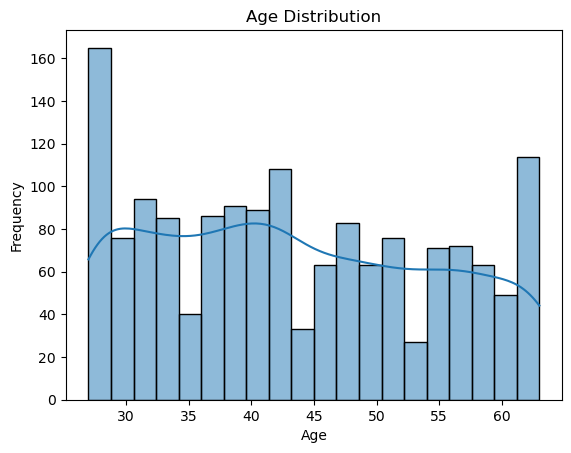

In [311]:
import seaborn as sns
sns.histplot(merged_data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [312]:
from scipy.stats import skew

# Calculate skewness
age_skewness = skew(merged_data['age'])
print("Skewness:", age_skewness)

Skewness: 0.1824974454560268


The skewness value of 0.182 indicates that the distribution is slightly positively skewed. Nothing additional needs to be done.

## Feature Scaling

Scaling the age feature ensures it doesn't dominate other features in models sensitive to feature magnitude (e.g., Logistic Regression, k-NN). There are many techniques for feature scaling. I am using min-max scaling (also known as normalization).

In [313]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data['age_normalized'] = scaler.fit_transform(merged_data[['age']])

# Checking for Target/Response variable Imbalance

In [314]:
# Check the distribution of the target variable (Application_Status)
target_distribution = merged_data['application_status'].value_counts()
print(target_distribution)

# Calculate the percentage distribution
target_percentage = merged_data['application_status'].value_counts(normalize=True) * 100
print(target_percentage)

0    1373
1     175
Name: application_status, dtype: int64
0    88.69509
1    11.30491
Name: application_status, dtype: float64


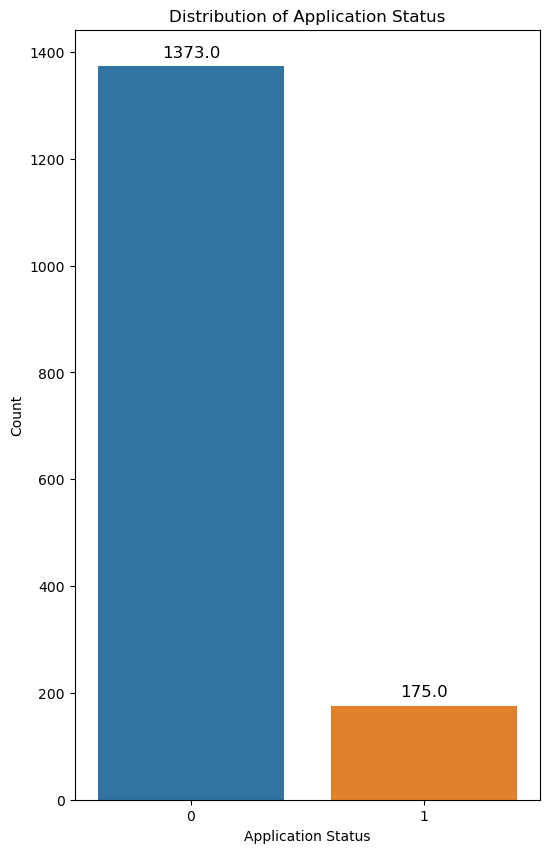

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable with labels
plt.figure(figsize=(6, 10))
ax = sns.countplot(x='application_status', data=merged_data)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

plt.title("Distribution of Application Status")
plt.xlabel('Application Status')
plt.ylabel('Count')
plt.show()

target variable Application_Status is significantly imbalanced, with approximately:

88.7% of applications approved (0).
11.3% of applications rejected (1).

# Data Splitting

1. Create Initial Train/Test Split

Split the data into a training+validation set and a final test set (e.g., 80% training+validation, 20% final test set).
The final test set remains untouched until the final evaluation.

2. Further Split Training+Validation

Split the training+validation set into separate training and validation subsets.

In [316]:
from sklearn.model_selection import train_test_split

# Initial split: Training+Validation (80%) and Test (20%)
X = merged_data.drop(columns=['application_status'])
y = merged_data['application_status']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split Training+Validation into Training (90% of 80%) and Validation (10% of 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42, stratify=y_train_val)

# Verify the splits
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Validation set size: {X_val.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 1100 rows
Validation set size: 138 rows
Test set size: 310 rows


# Assessing multiple algorithms

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [318]:
# Models and parameter grids
models_and_params = {
    "Logistic Regression": (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10]
    }),
    "Support Vector Classifier": (SVC(random_state=42, probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    })
}


In [319]:
# Dictionary to store results
results = {}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for model_name, (model, param_grid) in models_and_params.items():
    print(f"Training {model_name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predictions on validation set
    y_val_pred = best_model.predict(X_val)
    y_val_proba = best_model.predict_proba(X_val)[:, 1]
    
    # Evaluate metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred, pos_label=0),  # Positive class = 0
        'Recall': recall_score(y_val, y_val_pred, pos_label=0),
        'F1-Score': f1_score(y_val, y_val_pred, pos_label=0),
        'ROC-AUC': roc_auc_score(y_val, y_val_proba)
    }
    
    # Print the best parameters
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")


Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10}
Training Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'C': 10, 'kernel': 'linear'}
Training Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Training Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 2}
Training K-Nearest Neighbors...
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Training Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [320]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T  # Transpose to align metrics with models

# Display the table
print("\nComparison Table:")
print(results_df)


Comparison Table:
                           Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression        0.884058   0.884058  1.000000  0.938462  0.579150
Support Vector Classifier  0.884058   0.884058  1.000000  0.938462  0.565318
Random Forest              0.927536   0.937500  0.983607  0.960000  0.844775
Decision Tree              0.833333   0.930435  0.877049  0.902954  0.741547
K-Nearest Neighbors        0.927536   0.937500  0.983607  0.960000  0.797643
Gradient Boosting          0.913043   0.936508  0.967213  0.951613  0.863473


Based on this table, random forest model is the best model

In [321]:
# Use the Random Forest model with the best parameters
best_rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
best_rf.fit(X_train_val, y_train_val)


RandomForestClassifier(n_estimators=200, random_state=42)

In [322]:
y_test_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Print metrics for the best model
from sklearn.metrics import classification_report, roc_auc_score

print("Best Model (Random Forest) Classification Report:")
print(classification_report(y_test, y_test_pred))

# ROC-AUC Score
print(f"Best Model ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")

Best Model (Random Forest) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       275
           1       0.67      0.34      0.45        35

    accuracy                           0.91       310
   macro avg       0.79      0.66      0.70       310
weighted avg       0.89      0.91      0.89       310

Best Model ROC-AUC Score: 0.8004


# Compare best model with dummy classifier

In [323]:
from sklearn.dummy import DummyClassifier

# Dummy model (most frequent strategy)
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict on test data
y_dummy_pred = dummy_clf.predict(X_test)
y_dummy_proba = dummy_clf.predict_proba(X_test)[:, 1]

# Print metrics for the dummy model
print("Dummy Model Classification Report:")
print(classification_report(y_test, y_dummy_pred))

# ROC-AUC Score
print(f"Dummy Model ROC-AUC Score: {roc_auc_score(y_test, y_dummy_proba):.4f}")

Dummy Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       275
           1       0.00      0.00      0.00        35

    accuracy                           0.89       310
   macro avg       0.44      0.50      0.47       310
weighted avg       0.79      0.89      0.83       310

Dummy Model ROC-AUC Score: 0.5000


C:\Users\Anushka Mondal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anushka Mondal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anushka Mondal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [324]:
# Comparison table for dummy model and best model (Random Forest)
comparison_metrics = {
    'Accuracy': [accuracy_score(y_test, y_test_pred), accuracy_score(y_test, y_dummy_pred)],
    'Precision': [precision_score(y_test, y_test_pred, pos_label=0), precision_score(y_test, y_dummy_pred, pos_label=0)],
    'Recall': [recall_score(y_test, y_test_pred, pos_label=0), recall_score(y_test, y_dummy_pred, pos_label=0)],
    'F1-Score': [f1_score(y_test, y_test_pred, pos_label=0), f1_score(y_test, y_dummy_pred, pos_label=0)],
    'ROC-AUC': [roc_auc_score(y_test, y_test_proba), roc_auc_score(y_test, y_dummy_proba)]
}

# Create the comparison table
comparison_df = pd.DataFrame(comparison_metrics, index=['Best Model (Random Forest)', 'Dummy Model'])
print(comparison_df)

                            Accuracy  Precision    Recall  F1-Score   ROC-AUC
Best Model (Random Forest)  0.906452   0.921233  0.978182  0.948854  0.800364
Dummy Model                 0.887097   0.887097  1.000000  0.940171  0.500000


Key Takeaways:

Random Forest Model:

Outperforms the Dummy model in all metrics except recall for the negative class (1).

This suggests the Random Forest model is a better classifier overall, with good precision, recall, and F1-score for the positive class (0).

The ROC-AUC score shows that the Random Forest is much better at distinguishing between the two classes.

Dummy Model:

While the Dummy model has perfect recall for the majority class (0), it completely fails at identifying the minority class (1).

It is biased toward predicting the majority class, making it unsuitable for imbalanced datasets like yours.

# Error Analysis

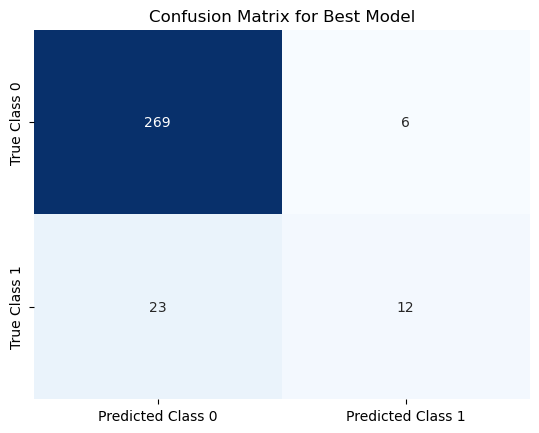

In [325]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Best Model
cm = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(cm, columns=['Predicted Class 0', 'Predicted Class 1'],
                           index=['True Class 0', 'True Class 1'])

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Best Model')
plt.show()


# Measuring Bias and Variance

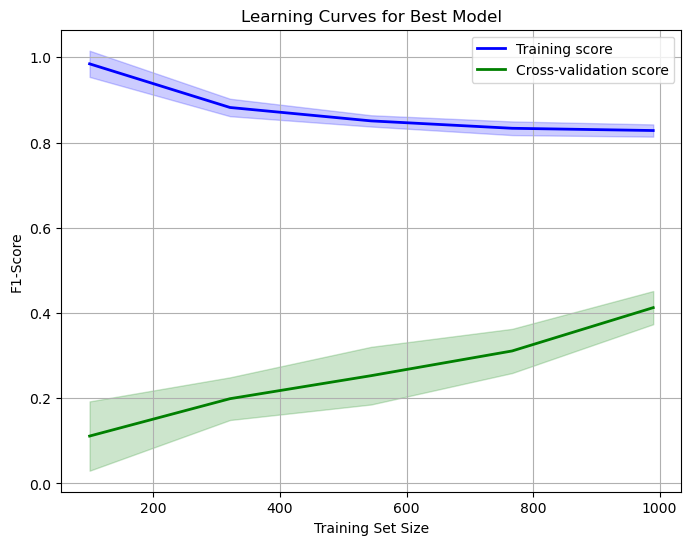

In [326]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train_val, y_train_val, cv=5, scoring='f1', n_jobs=-1)

# Calculate mean and standard deviation for plotting
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue", lw=2)
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green", lw=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curves for Best Model")
plt.xlabel("Training Set Size")
plt.ylabel("F1-Score")
plt.legend()
plt.grid()
plt.show()


Training Score (Blue Curve):

The training score starts very high (near 1.0) and gradually decreases as the training set size increases.
This indicates that the model fits the training data very well when the training size is small (likely overfitting).
As the training set grows, the model's training performance stabilizes around 0.83.

Cross-Validation Score (Green Curve):

The cross-validation score starts very low (around 0.1) and increases slowly with the training set size.
However, it remains significantly lower than the training score, even at the largest training size.
This indicates high bias and possibly some underfitting because the model fails to generalize effectively.

Bias and Variance Implications:

High Bias: The cross-validation score is low and doesn't improve much, suggesting that the model is too simplistic or not capturing the underlying patterns in the data effectively.
Variance: The gap between the training score and the cross-validation score indicates that the model is overfitting on small training sets. This variance gap reduces slightly as the training size increases but remains prominent.

The model has high bias (low cross-validation score) and moderate variance (gap between the curves).